<a href="https://colab.research.google.com/github/AllenHichard/Analise_Algoritmos/blob/main/Mediana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algoritmos

In [ ]:

def mediana_Naive(L):
    L = sorted(L)
    print("Ordenado - ", L)
    return L[int((len(L)-1)/2)] #len(L)-1 to pick up the left element for the even size vector
  

Coleta de dados dos experimentos

In [ ]:
import time
from numpy import random
DOMAIN = 100 ##Você deve escolher um valor mais adequado
def avg_time(domain, tam, func, rounds): 
  sum = float(0)
  for i in range(rounds):
    #create a list with random numbers
    random.seed(i)
    L=list(random.randint(tam+domain, size=tam))
 
    start = time.time()    
    func(L)
    end = time.time()
    sum += end-start
  return sum/rounds

#defines the algorithms to be processed
algorithms = [mediana_Naive, mediana_QuickSelect]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 1000 

sizes = [5,10,15,20,25] ##você deve escolher tamanhos mais adequados
mapSizeToTime = dict()
for i in range(len(sizes)):
  print(f"Starting experiments for datasets with size={sizes[i]}, each experiment has {num_rounds} rounds.")
  
  ##Map list size to algorithm average time
  for algorithm in algorithms:      
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds)
  
print(f"Finish data collection")

Starting experiments for datasets with size=5, each experiment has 1000 rounds.
Starting experiments for datasets with size=10, each experiment has 1000 rounds.
Starting experiments for datasets with size=15, each experiment has 1000 rounds.
Starting experiments for datasets with size=20, each experiment has 1000 rounds.
Starting experiments for datasets with size=25, each experiment has 1000 rounds.
Finish data collection


Formata os dados do experimento para serem exibidos

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
unique_Naive##5,0.000006,unique_Naive,5
unique_Sort##5,0.000004,unique_Sort,5
unique_Hash##5,0.000002,unique_Hash,5
unique_Naive##10,0.000010,unique_Naive,10
unique_Sort##10,0.000003,unique_Sort,10
unique_Hash##10,0.000003,unique_Hash,10
unique_Naive##15,0.000014,unique_Naive,15
unique_Sort##15,0.000004,unique_Sort,15
unique_Hash##15,0.000004,unique_Hash,15
unique_Naive##20,0.000034,unique_Naive,20


Resultado do experimento (gráfico)

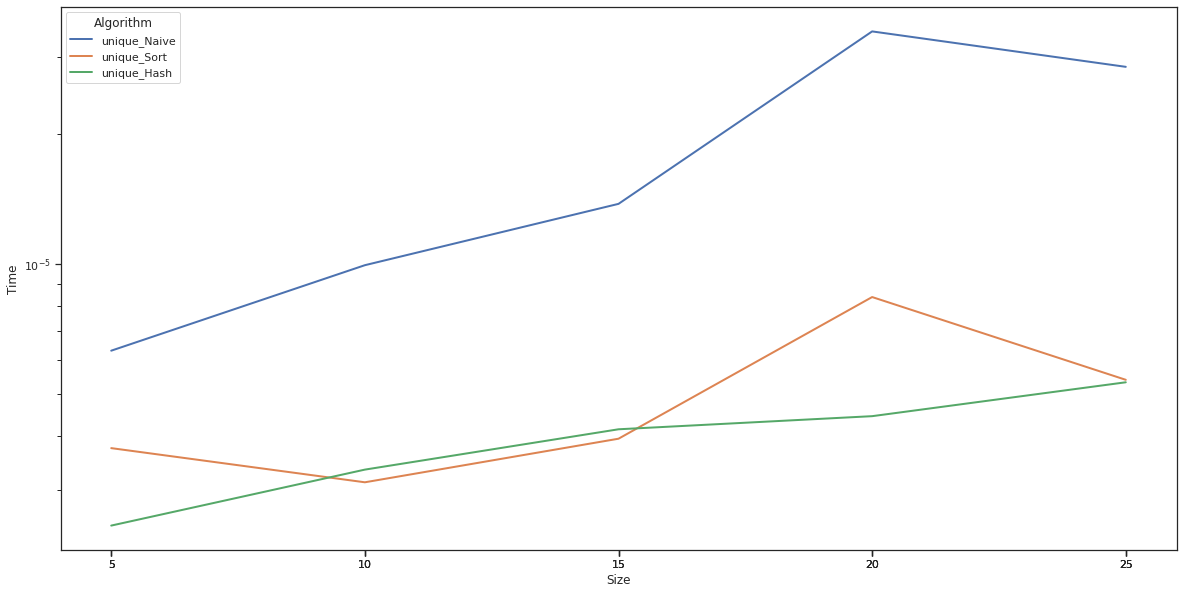

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
g.set_yscale('log')
g.set(xticks=[i for i in df.Size])
plt.show()